In [1]:
import json
from datetime import datetime
from glob import glob
from typing import Dict, List

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
advanced_sns_files = glob("../raw_data/korean_corpus/advanced_social_network/*.jsonl")
messenger_files = glob("../raw_data/korean_corpus/messenger/*.jsonl")
online_conv_files = glob("../raw_data/korean_corpus/onlineConversation/*.jsonl")
print(f"advanced_sns_files: {len(advanced_sns_files)}")
print(f"messenger_files: {len(messenger_files)}")
print(f"online_conv_files: {len(online_conv_files)}")

advanced_sns_files: 1554
messenger_files: 4
online_conv_files: 72


In [3]:
advanced_sns_data, messenger_data, online_conv_data = [], [], []
for f in tqdm(advanced_sns_files):
    with open(f) as f:
        advanced_sns_data.extend([json.loads(line) for line in f])

for f in tqdm(messenger_files):
    with open(f) as f:
        messenger_data.extend([json.loads(line) for line in f])

for f in tqdm(online_conv_files):
    with open(f) as f:
        online_conv_data.extend([json.loads(line) for line in f])

print(f"advanced_sns_data: {len(advanced_sns_data)}")
print(f"messenger_data: {len(messenger_data)}")
print(f"online_conv_data: {len(online_conv_data)}")

100%|██████████| 72/72 [00:01<00:00, 39.17it/s]

advanced_sns_data: 1553577
messenger_data: 3819
online_conv_data: 71071


In [4]:
def calculate_time_diff(sessions: List[Dict[str, str]]) -> List[int]:
    time_diff_list = []

    for i in range(1, len(sessions)):
        cur_datetime = datetime.strptime(sessions[i]["datetime"], "%Y-%m-%d %H:%M")
        prev_datetime = datetime.strptime(sessions[i-1]["datetime"], "%Y-%m-%d %H:%M")

        time_diff = cur_datetime - prev_datetime
        diff_minutes = time_diff.total_seconds() / 60
        time_diff_list.append(diff_minutes)

    return time_diff_list

In [5]:
def speaker_change_indices(sessions: List[Dict[str, str]]) -> List[int]:
    indices = []

    for i in range(1, len(sessions)):
        if sessions[i]["speaker"] != sessions[i-1]["speaker"]:
            indices.append(i)

    return indices

In [6]:
time_diffs = []
for d in tqdm(advanced_sns_data):
    time_diffs.extend(calculate_time_diff(d["session"]))

for d in tqdm(messenger_data):
    time_diffs.extend(calculate_time_diff(d["session"]))

for d in tqdm(online_conv_data):
    time_diffs.extend(calculate_time_diff(d["session"]))

100%|██████████| 71071/71071 [00:13<00:00, 5219.30it/s]


In [17]:
len(time_diffs)

25572523

In [8]:
print("Overall Stats")
print(f"Mean: {np.mean(time_diffs)}")
print(f"Median: {np.median(time_diffs)}")
print(f"Max: {max(time_diffs)}")
print(f"Min: {min(time_diffs)}")
print(f"Std: {np.std(time_diffs)}")

Stats
Mean: 7.153827488981044
Median: 0.0
Max: 975890.0
Min: 0.0
Std: 477.9727889091414


In [13]:
gt_0 = [t for t in time_diffs if t > 0]
geq_5 = [t for t in time_diffs if t >= 5]
geq_10 = [t for t in time_diffs if t >= 10]
geq_10_leq_1440 = [t for t in time_diffs if t >= 10 and t <= 1440]
print(f"gt 0m (%): {len(gt_0) / len(time_diffs) * 100}%")
print(f"geq 5m (%): {len(geq_5) / len(time_diffs) * 100}%")
print(f"geq 10m (%): {len(geq_10) / len(time_diffs) * 100}%")
print(f"geq 10m and leq 1440m (%): {len(geq_10_leq_1440) / len(time_diffs) * 100}%")

gt 0m (%): 27.092227075130598%
geq 5m (%): 8.570026508530269%
geq 10m (%): 5.891303724704833%
geq 10m and leq 1440m (%): 5.853481879750387%


In [19]:
print("10-1440 Stats")
print(f"Mean: {np.mean(geq_10_leq_1440)}")
print(f"Median: {np.median(geq_10_leq_1440)}")
print(f"Max: {max(geq_10_leq_1440)}")
print(f"Min: {min(geq_10_leq_1440)}")
print(f"Std: {np.std(geq_10_leq_1440)}")

10-1440 Stats
Mean: 74.03052142351807
Median: 28.0
Max: 1440.0
Min: 10.0
Std: 147.1548678250028


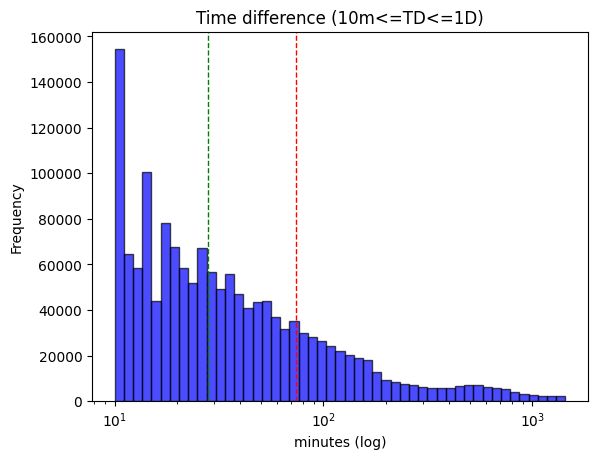

In [24]:
plt.hist(geq_10_leq_1440, bins=np.logspace(np.log10(10), np.log10(np.max(geq_10_leq_1440))), color="blue", alpha=0.7, edgecolor="black")
plt.xscale("log")
plt.title("Time difference (10m<=TD<=1D)")
plt.xlabel("minutes (log)")
plt.ylabel("Frequency")
plt.axvline(np.mean(geq_10_leq_1440), color="red", linestyle="dashed", linewidth=1)
plt.axvline(np.median(geq_10_leq_1440), color="green", linestyle="dashed", linewidth=1)
plt.show()